In [1]:
import nbsetup
from models.load import load_sparc
from models.sparc.result import Result
from models.sparc.tune import Tune
from models.sparc.mcmc import mcmc

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
The installed Theano(-PyMC) version (1.0.5) does not match the PyMC3 requirements.
It was imported from ['/Users/timjdavey/Projects/pmog/lib/python3.10/site-packages/theano']
For PyMC3 to work, a compatible Theano-PyMC backend version must be installed.
See https://github.com/pymc-devs/pymc3/wiki for installation instructions.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


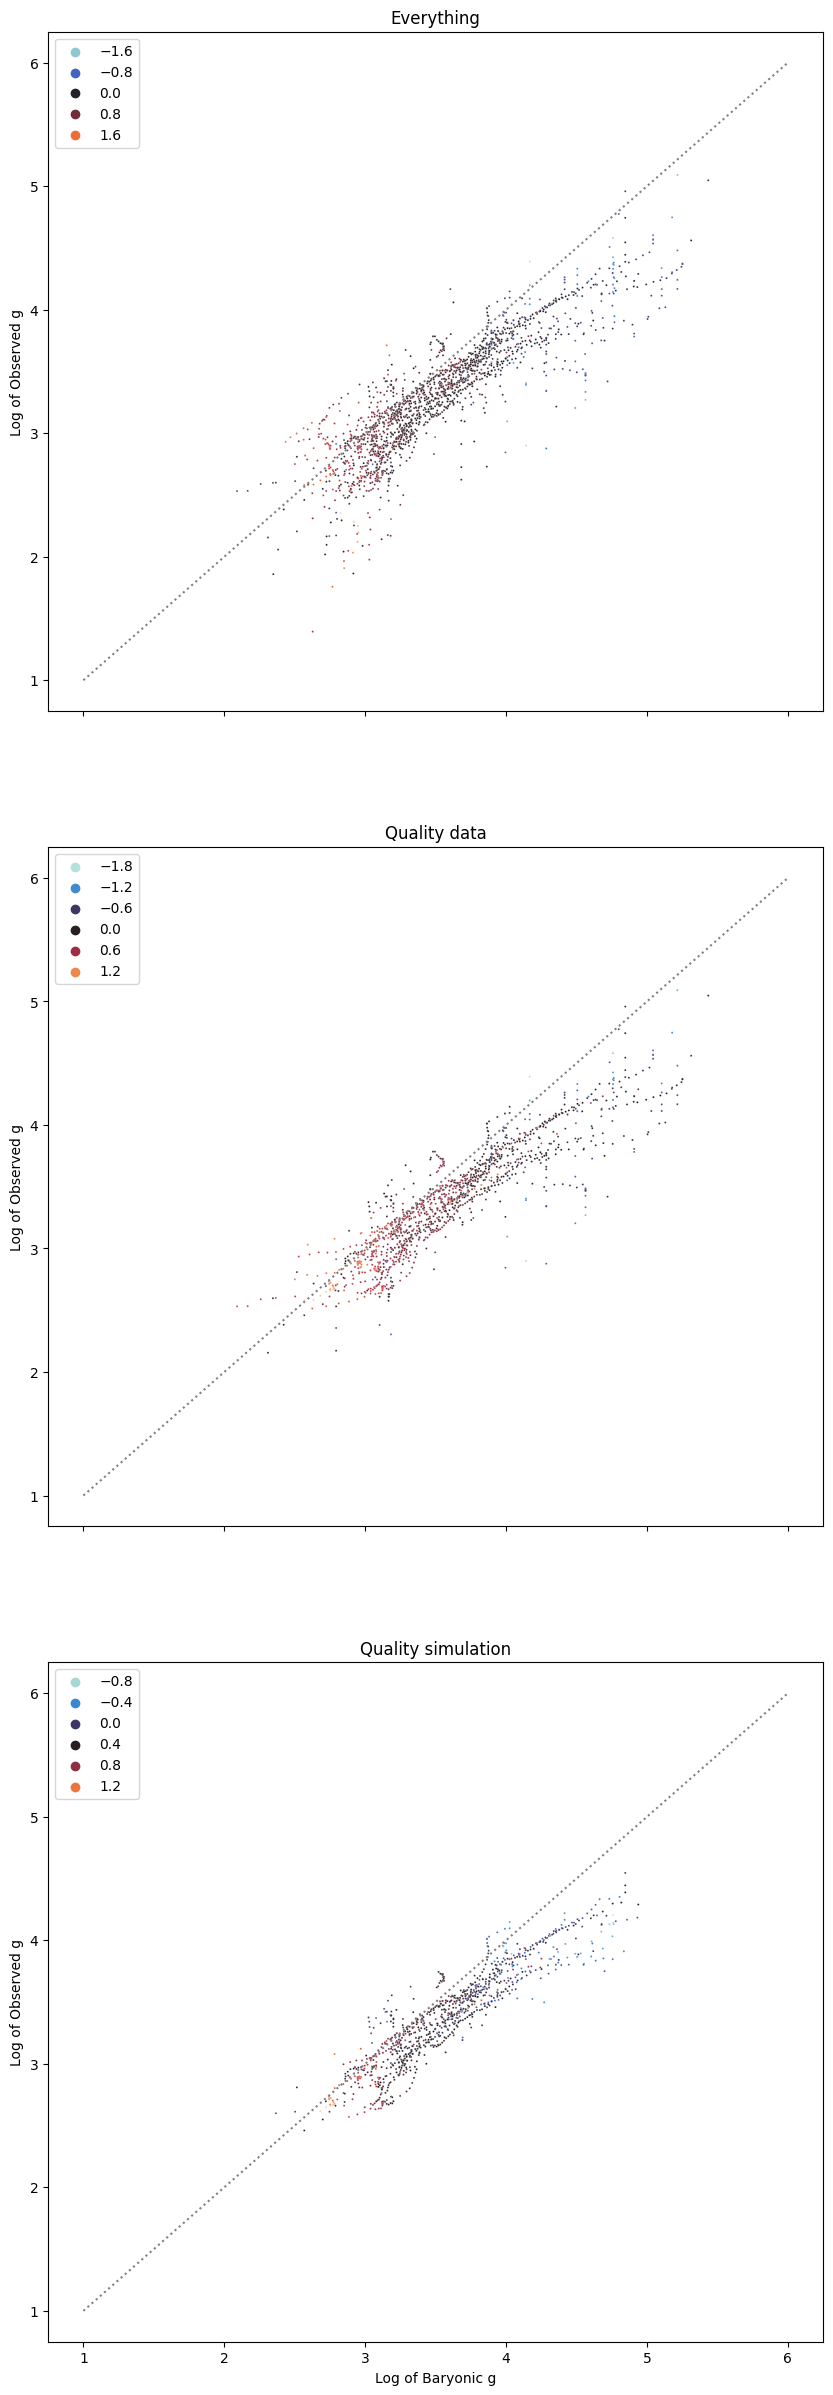

In [11]:
raw = Result(load_sparc(namespace='pmog/47_1'))
g = raw.plot_rar()

In [4]:
analysis = Tune(mcmc(raw.datasets()['Quality simulation']))

In [5]:
tuned = analysis.Result()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Ymass, D, Inc]


/Users/timjdavey/Projects/pmog/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/timjdavey/Projects/pmog/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
The installed Theano(-PyMC) version (1.0.5) does not match the PyMC3 requirements.
It was imported from ['/Users/timjdavey/Projects/pmog/lib/python3.10/site-packages/theano']
For PyMC3 to work, a compatible Theano-PyMC backend version must be installed.
See https://github.com/pymc-devs/pymc3/wiki for installation instructions.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
The installed Theano(-PyMC) version (1.0.5) does not match the PyMC3 requirements.
It was imported from ['/Users/timjdavey/Projects/pmog/lib/python3.10/site-packages/theano']
For PyMC3 to work, a compatible Theano-PyMC backend version must be installed.
See https://github.com/pymc-devs/pymc3/wiki for installation instructions.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


/Users/timjdavey/Projects/pmog/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
The installed Theano(-PyMC) version (1.0.5) does not match the PyMC3 requirements.
It was imported from ['/Users/timjdavey/Projects/pmog/lib/python3.10/site-packages/theano']
For PyMC3 to work, a compatible Theano-PyMC backend version must be installed.
See https://github.com/pymc-devs/pymc3/wiki for installation instructions.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
The installed Theano(-PyMC) version (1.0.5) does not match the PyMC3 requirements.
It was imported from ['/Users/timjdavey/Projects/pmog/lib/python3.10/site-packages/theano']
For PyMC3 to work, a compatible Theano-PyMC backend version must be installed.
See https://github.com/pymc-devs/pymc3/wiki for installation instructions.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


/Users/timjdavey/Projects/pmog/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 7 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


TypeError: Result.__init__() missing 1 required positional argument: 'simulations'

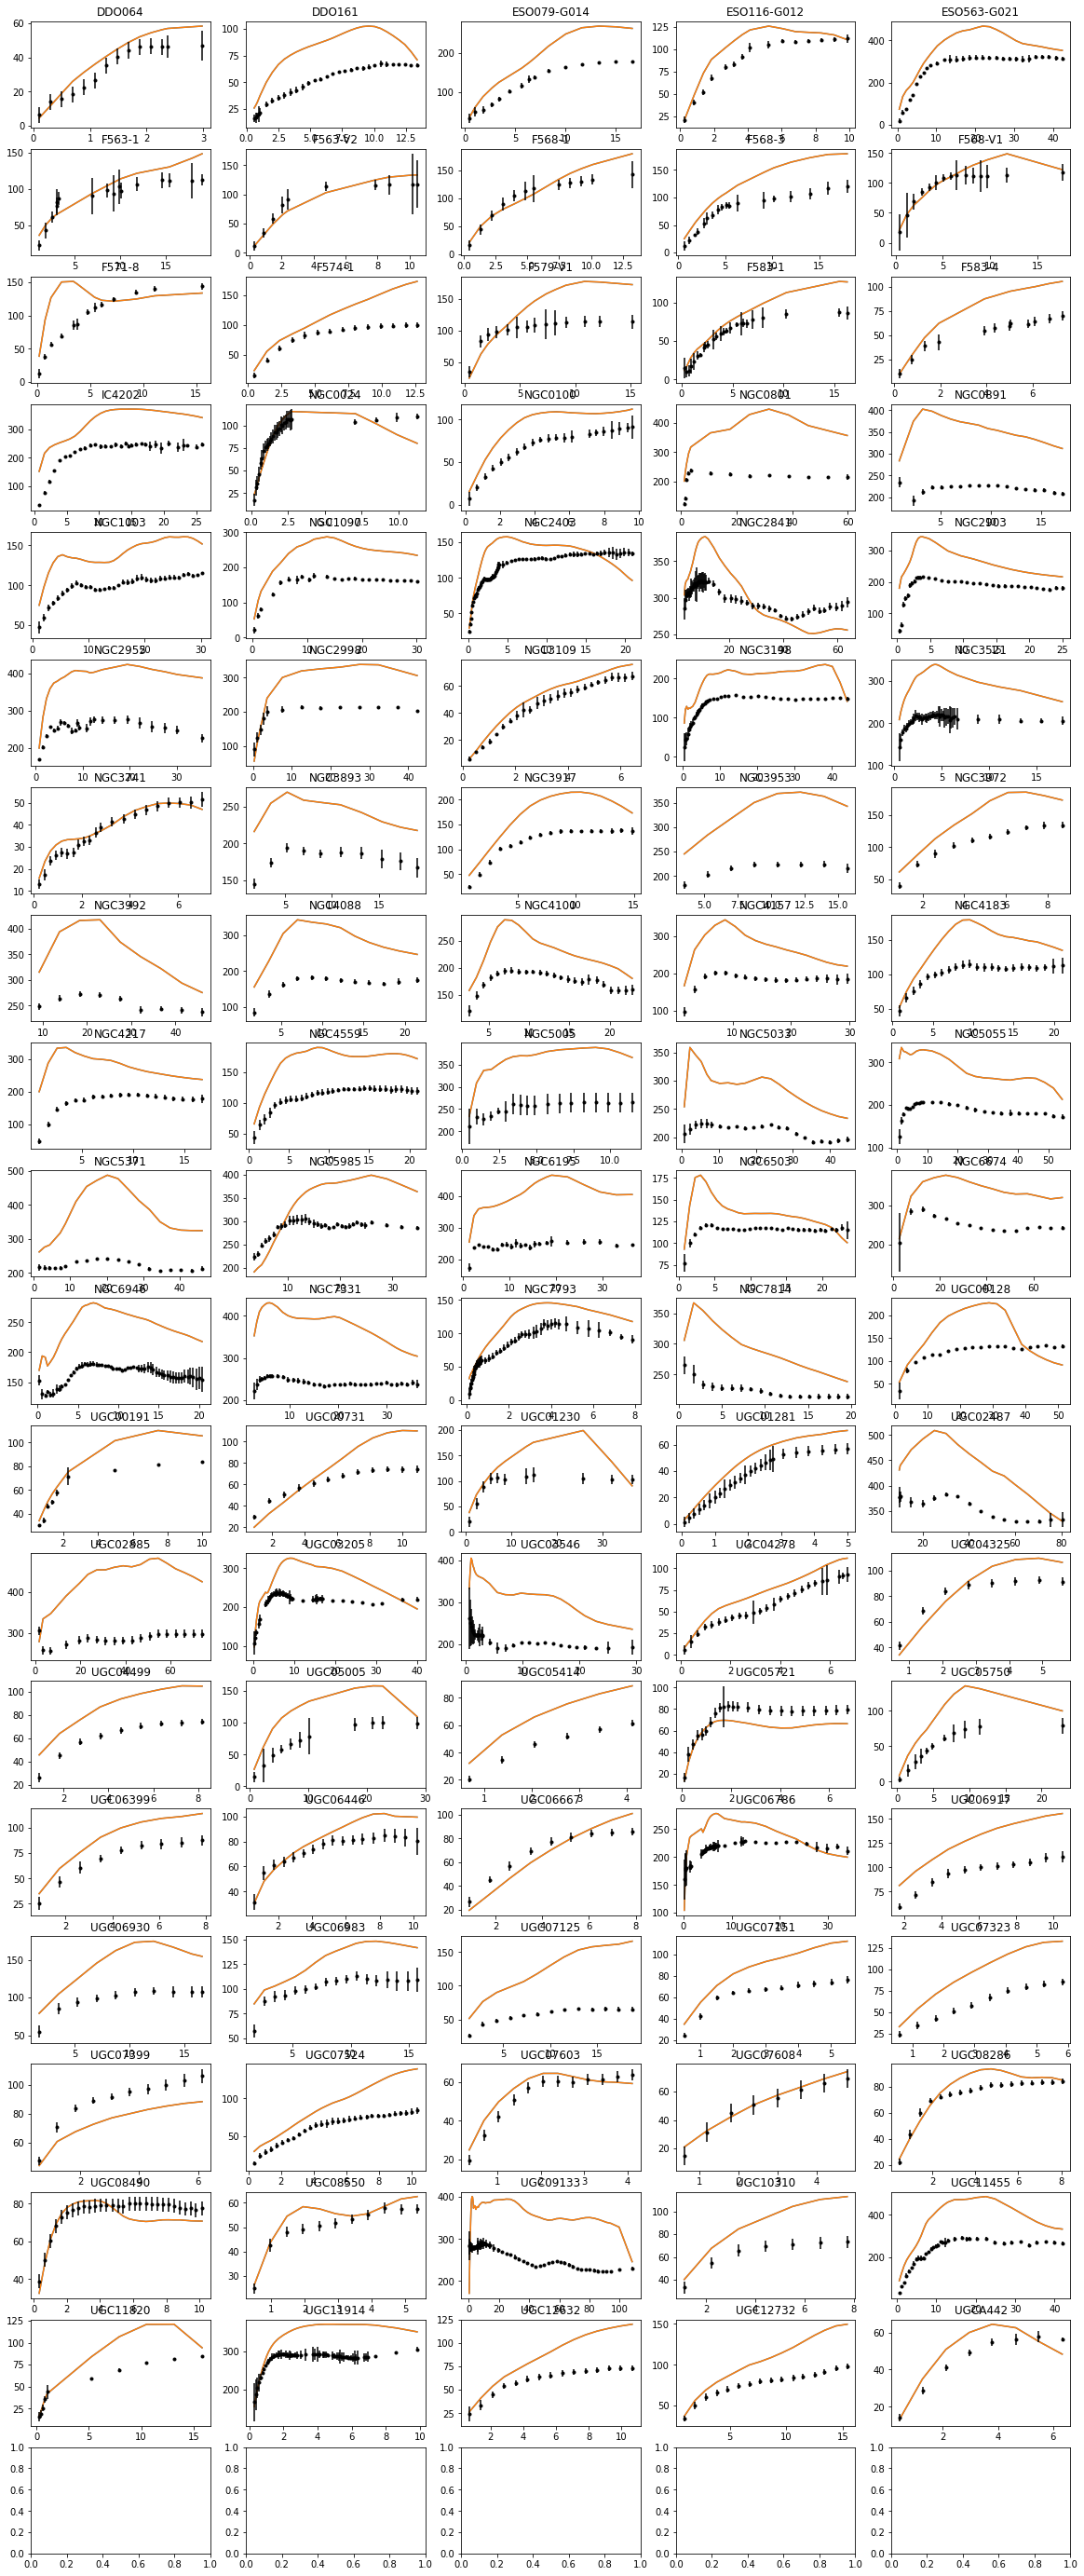

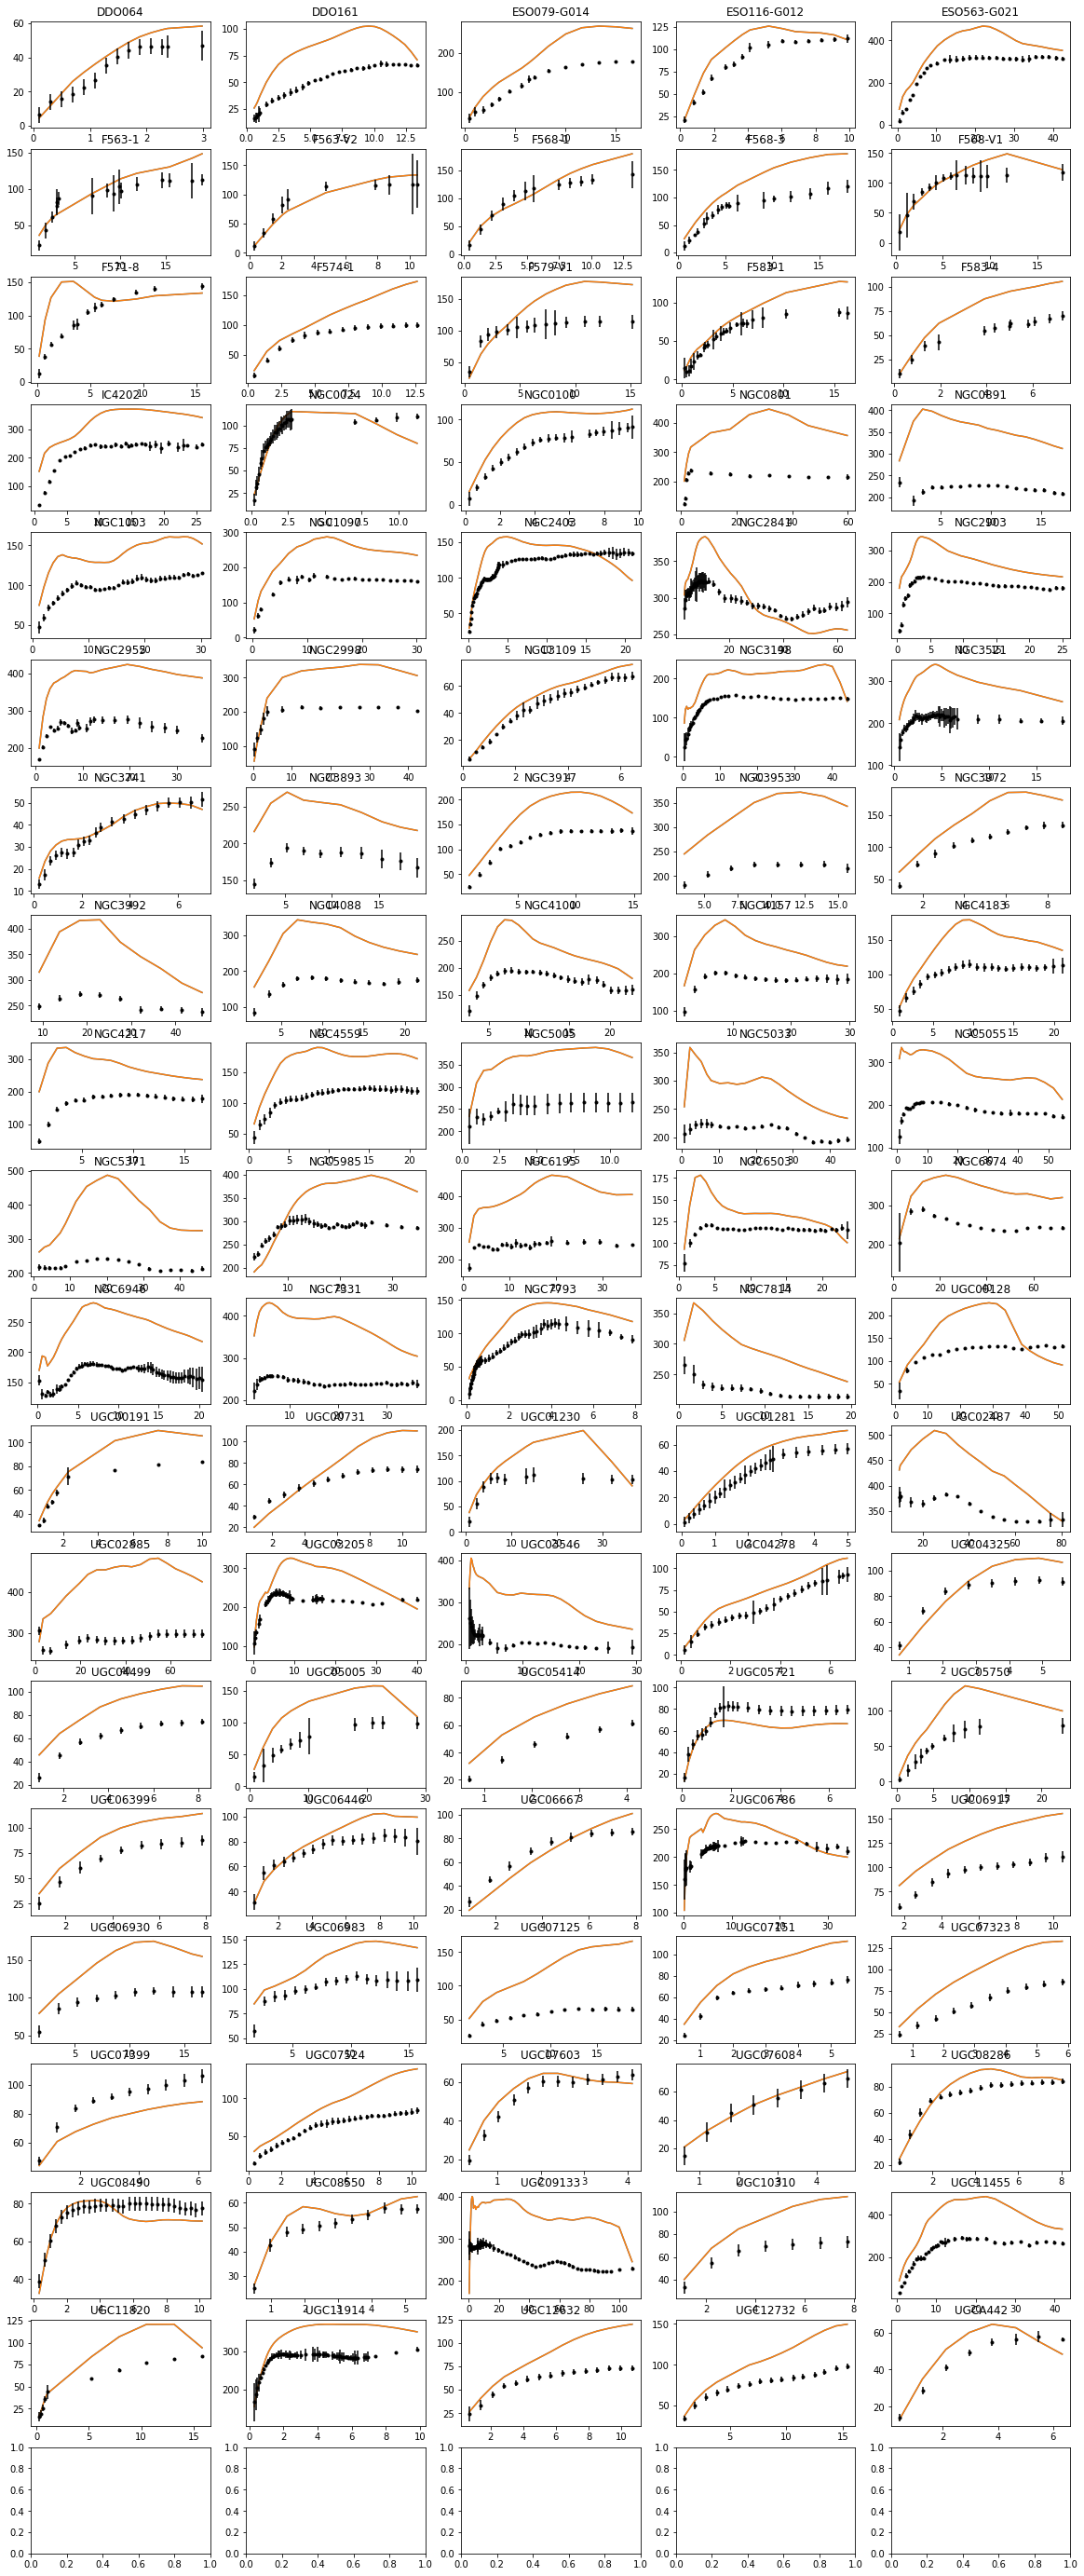

In [6]:
standard = Result(load_sparc(namespace='pmog/201_21'))
raw.plot_curves(standard)